# Imports

In [1]:
from sinenn import SineNN, sinenn_weights
from maen_score import maen_score

import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

# Sin-wave Generation

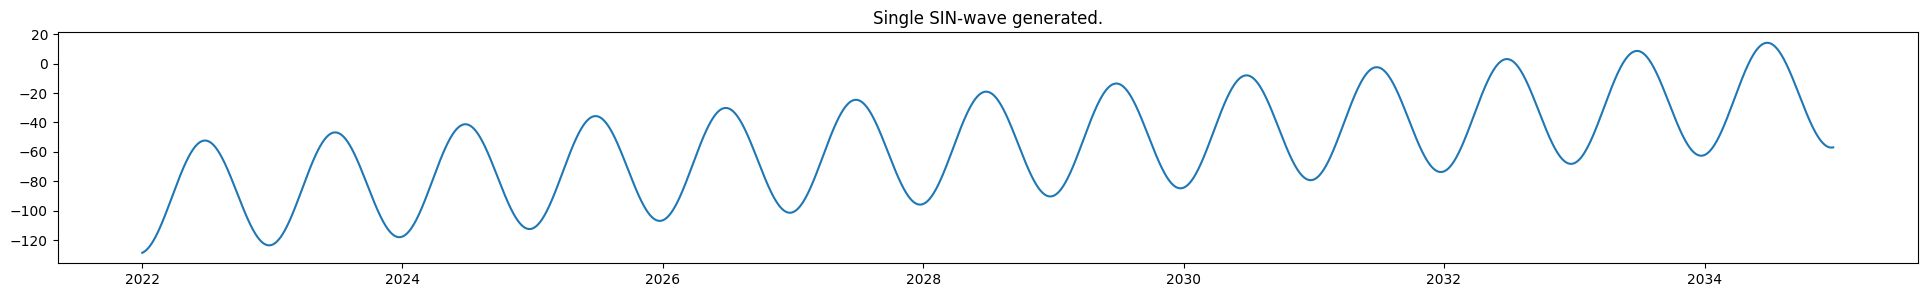

In [2]:
n_years = np.random.randint(1, 15)
frequency = 2 * np.pi / 365.25

beta = 1
elevation_power = 0
amplitude_change_power = 0
variation = True

amplitude = np.random.randint(-100, 100)
phase_shift = np.random.randint(-180, 180)
period_starts = pd.Timestamp('2022-01-01')
a = np.random.randint(-500, 500) / (n_years * 365.25)
b = np.random.randint(-100, 100)

duration_days = 365 * n_years
period_ends = period_starts + pd.Timedelta(days=duration_days)

X = np.linspace(1, duration_days, duration_days)

if not variation:
    y = amplitude * np.sin(frequency * X + phase_shift)
else:
    y = amplitude * (X**amplitude_change_power) * np.sin(X**beta * frequency + phase_shift)

y += a * X + b
y += -1 + X**elevation_power
x_date = pd.date_range(period_starts, period_ends, freq='D')[:-1]

plt.figure(figsize=(24,3))
plt.plot(x_date, y)
plt.title('Single SIN-wave generated.')
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, shuffle=False)

In [25]:
sin_model = SineNN(
    X_train,
    y_train,
    learning_rate=0.1,
    linear_trend_trainable=True,
    wave_components_trainable=True,
    waves=[1, 1/2, 1/3],
    show_summary=True
)()


Model: "SineNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 1)         │       0 │ -                    │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ Wave_1 (Functional) │ (None, 1)         │       5 │ input[0][0]          │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ Wave_2 (Functional) │ (None, 1)         │       5 │ input[0][0]          │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ Wave_3 (Functional) │ (None, 1)         │       5 │ input[0][0]          │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ add_waves (Add)     │ (None, 1)         │       0 │ Wave_1[0][0],        │
│                     │                   │         │ Wave_2[0][0],        │
│                     │                   │         │ Wave_3[0][0]         │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ Trend (Functional)  │ (None, 1)         │       4 │ input[0][0]          │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ waves_output        │ (None, 1)         │       0 │ add_waves[0][0]      │
│ (Lambda)            │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ output (Add)        │ (None, 1)         │       0 │ Trend[0][0],         │
│                     │                   │         │ waves_output[0][0]   │
└─────────────────────┴───────────────────┴─────────┴──────────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 6 (24.00 B)

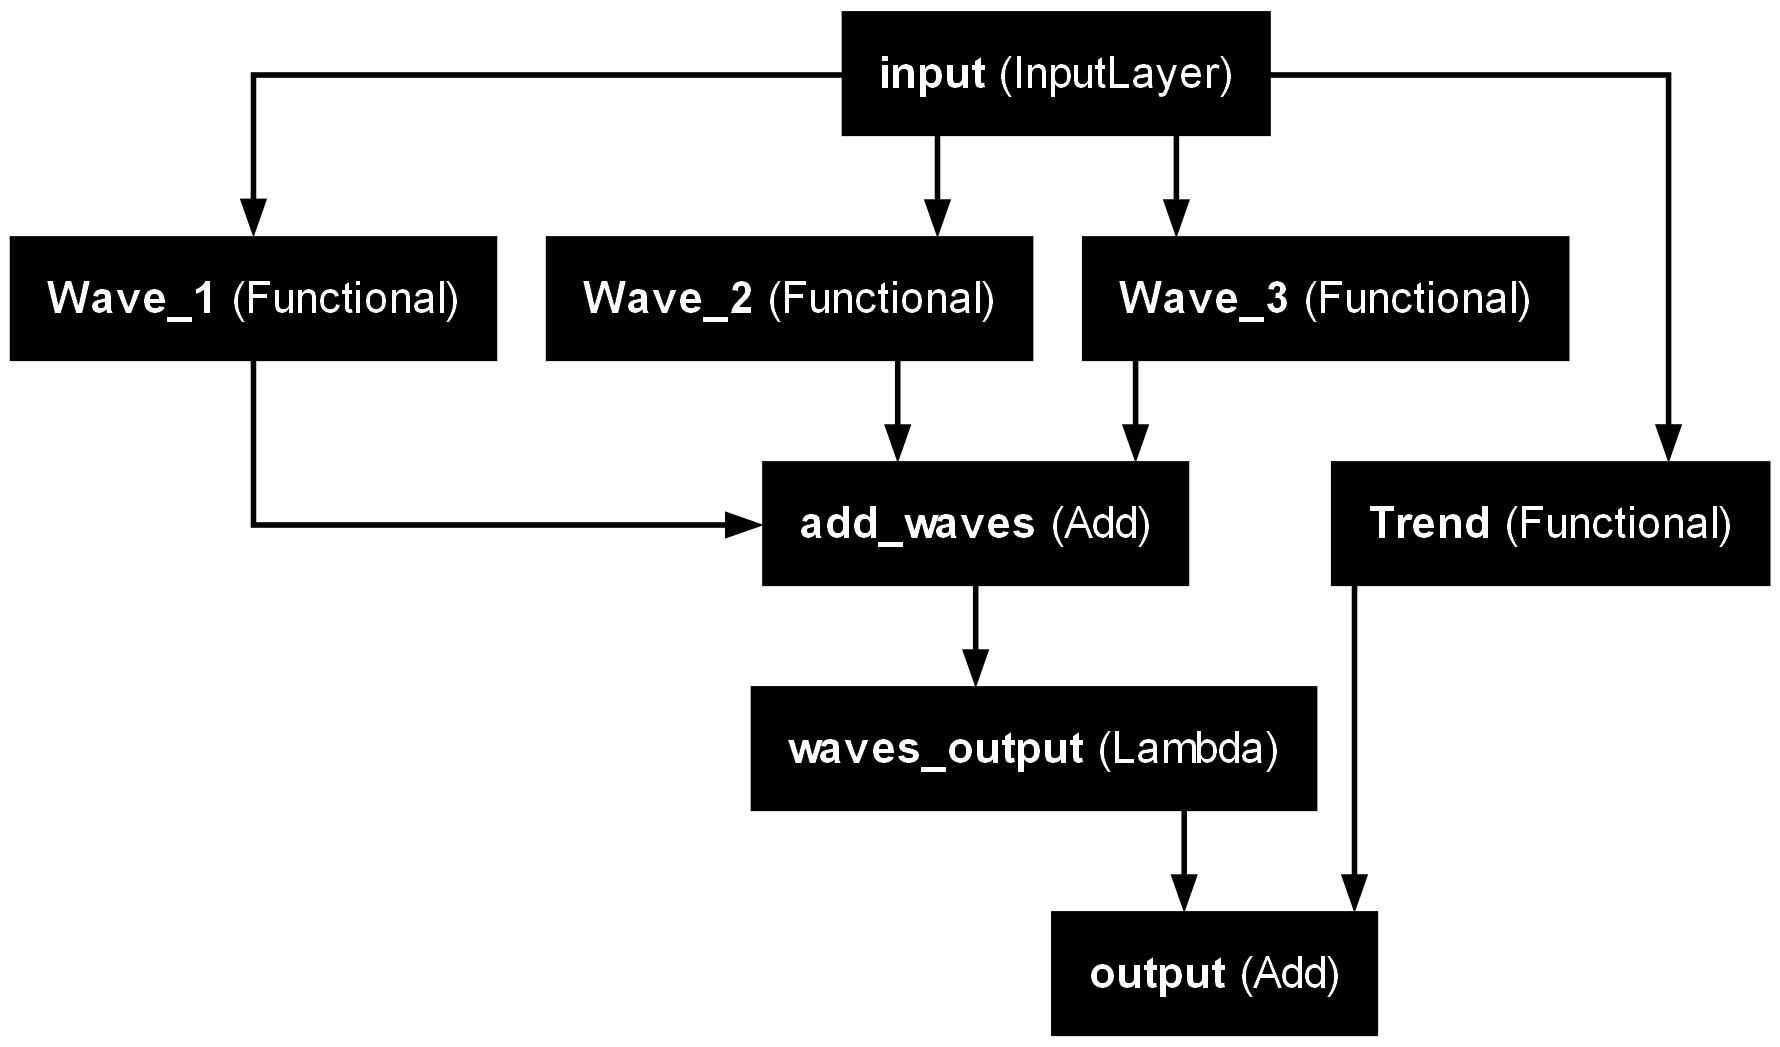

In [26]:
tf.keras.utils.plot_model(sin_model, show_layer_names=True)

In [27]:
sinenn_weights(sin_model)

['phase_shift_1: 1.0000',
 'frequency_1: 0.0172',
 'phase_shift_amplifier_1: 1.0000',
 'sin_1: 1.0000',
 'amplitude_1: 63.0799',
 'phase_shift_2: 1.0000',
 'frequency_2: 0.0344',
 'phase_shift_amplifier_2: 1.0000',
 'sin_2: 1.0000',
 'amplitude_2: 63.0799',
 'phase_shift_3: 1.0000',
 'frequency_3: 0.0516',
 'phase_shift_amplifier_3: 1.0000',
 'sin_3: 1.0000',
 'amplitude_3: 63.0799',
 'linear_rotation: 0.0161',
 'y_shift: -92.9519',
 'linear_rotation_handler: 1.0000',
 'y_shift_amplifier: 1.0000']

# Forecast:  Test on a synthetic example

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


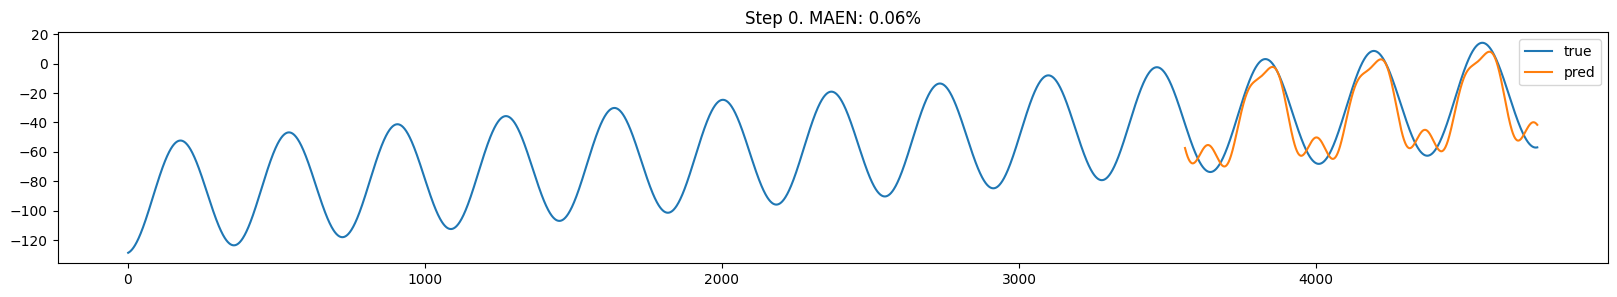

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


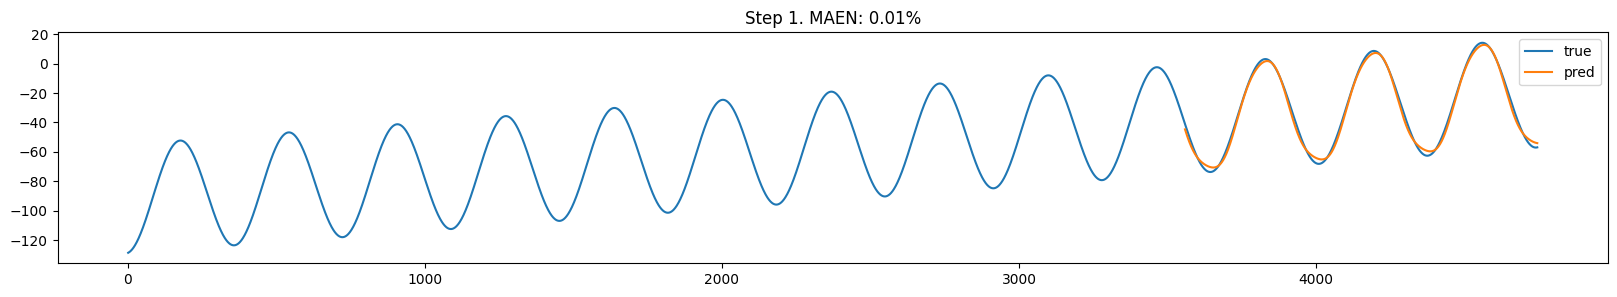

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


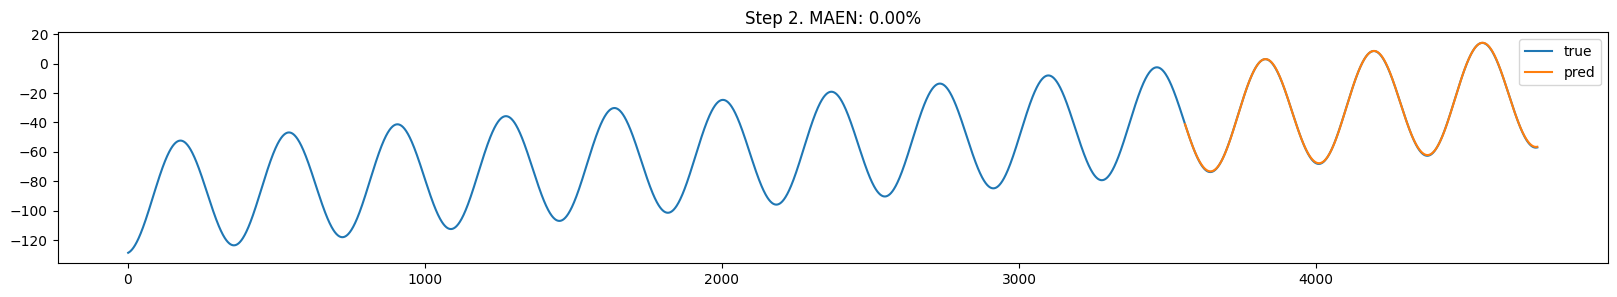

In [28]:
for step in range(3):
  sin_model.fit(
    X_train,
    y_train,
    epochs=5,
    verbose=False
  )
  y_pred = sin_model.predict(X_test).flatten()
  maen =  maen_score(y_test, y_pred, min_=y.min(), max_=y.max())
  fig = plt.figure(figsize=(20, 3))
  plt.plot(X.flatten(), y, label='true')
  plt.plot(X_test.flatten(), y_pred, label='pred')
  plt.title(f'Step {step}. MAEN: {maen:.2f}%')
  plt.legend()
  plt.show()

In [29]:
sinenn_weights(sin_model)

['phase_shift_1: 1.0000',
 'frequency_1: 0.0172',
 'phase_shift_amplifier_1: -1.4538',
 'sin_1: 1.0000',
 'amplitude_1: 110.8014',
 'phase_shift_2: 1.0000',
 'frequency_2: 0.0344',
 'phase_shift_amplifier_2: 1.9010',
 'sin_2: 1.0000',
 'amplitude_2: 0.4632',
 'phase_shift_3: 1.0000',
 'frequency_3: 0.0516',
 'phase_shift_amplifier_3: 2.5962',
 'sin_3: 1.0000',
 'amplitude_3: 0.5432',
 'linear_rotation: 0.0829',
 'y_shift: -92.9519',
 'linear_rotation_handler: 0.1832',
 'y_shift_amplifier: 0.9897']